In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten
from tensorflow.keras.regularizers import l2
import os
from os import listdir
import gdown
from zipfile import ZipFile
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer

In [2]:
from tensorflow.keras.utils import img_to_array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            img_gan = cv2.resize(image, (32,32))
            return img_to_array(img_gan)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [3]:
def extract_plant_imgs(directory_root,num):
    image_list, label_list = [], []
    try:
        print("[INFO] Loading images ...")
        root_dir = listdir(directory_root)
        #print(root_dir)
        for plant_folder in root_dir :
            # remove .DS_Store from list
            if plant_folder == ".DS_Store" :
                root_dir.remove(directory)


        for plant_folder in root_dir :
    #         print("on plant folder")
            plant_image_list = listdir(f"{directory_root}/{plant_folder}")



            for single_image in plant_image_list :

    #             print("in plant folder")
                if single_image == ".DS_Store" :
                    plant_image_list.remove(single_image)

            for image in plant_image_list[:num]:
    #             print("getting img path")
                image_directory = f"{directory_root}/{plant_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True or image_directory.endswith(".png") == True or image_directory.endswith(".PNG") == True:
    #                 print("checking if img correct format")
                    gan_img = convert_image_to_array(image_directory)
                    image_list.append(gan_img)
                    label_list.append(plant_folder)

        print("[INFO] Image loading completed")
        return image_list, label_list
    except Exception as e:
        print(f"Error : {e}")

In [4]:
orignal_data = 'Orignal_cherry'
enhanced_data = 'Enhanced_cherry_LSGAN'

orignal_image_list , orignal_label_list = extract_plant_imgs(orignal_data,125)

[INFO] Loading images ...
[INFO] Image loading completed


In [5]:
enhanced_image_list , enhanced_label_list = extract_plant_imgs(enhanced_data,1000)
print(len(enhanced_image_list))

[INFO] Loading images ...
[INFO] Image loading completed
2000


In [6]:
combined_image_list = orignal_image_list + enhanced_image_list
print(len(combined_image_list))

2250


In [7]:
combined_label_list = orignal_label_list + enhanced_label_list
print(len(combined_label_list))

2250


In [8]:
new_image_list = np.array(combined_image_list, dtype = np.float16) / 255.0
print(new_image_list.shape)

(2250, 32, 32, 3)


In [9]:
combined_label_list = orignal_label_list+enhanced_label_list

In [10]:
label_gen = LabelBinarizer()
image_labels = label_gen.fit_transform(combined_label_list)
pickle.dump(label_gen,open('label_transform.pkl', 'wb'))
n_classes = len(label_gen.classes_)
print(n_classes)
print(image_labels)

2
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


In [11]:
from sklearn.model_selection import train_test_split
print("making the training and testing split with 30% of the dataset as testing set")
x_train, x_test, y_train, y_test = train_test_split(new_image_list, image_labels, test_size=0.3, shuffle=True,random_state = 42) 
print(x_train.shape)
print(x_test.shape)

making the training and testing split with 30% of the dataset as testing set
(1575, 32, 32, 3)
(675, 32, 32, 3)


In [12]:
model = Sequential()
model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

# model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3))
# model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Flatten())
model.add(Dense(128,activation="relu"))

#Output layer
model.add(Dense(1,kernel_regularizer=l2(0.01),activation = "linear"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [14]:
model.compile(optimizer="adam",loss="squared_hinge", metrics = ['accuracy'])

In [15]:
result = model.fit(x_train,y_train,epochs=15)

Epoch 1/15
50/50 [==============================] - 11s 11ms/step - loss: 0.4777 - accuracy: 0.7270
Epoch 2/15
50/50 [==============================] - 0s 5ms/step - loss: 0.0914 - accuracy: 0.9594
Epoch 3/15
50/50 [==============================] - 0s 5ms/step - loss: 0.1125 - accuracy: 0.9435
Epoch 4/15
50/50 [==============================] - 0s 5ms/step - loss: 0.0540 - accuracy: 0.9727
Epoch 5/15
50/50 [==============================] - 0s 6ms/step - loss: 0.0429 - accuracy: 0.9835
Epoch 6/15
50/50 [==============================] - 0s 6ms/step - loss: 0.0374 - accuracy: 0.9854
Epoch 7/15
50/50 [==============================] - 0s 6ms/step - loss: 0.0319 - accuracy: 0.9879
Epoch 8/15
50/50 [==============================] - 0s 6ms/step - loss: 0.0315 - accuracy: 0.9898
Epoch 9/15
50/50 [==============================] - 0s 6ms/step - loss: 0.0327 - accuracy: 0.9892
Epoch 10/15
50/50 [==============================] - 0s 6ms/step - loss: 0.0258 - accuracy: 0.9905
Epoch 11/15
50/50

In [16]:
orignal = 'Orignal_cherry'


orignal_img_list , orignal_lab_list = extract_plant_imgs(orignal,1000)

[INFO] Loading images ...
[INFO] Image loading completed


In [17]:
new_list = np.array(orignal_img_list, dtype = np.float16) / 255.0
print(new_list.shape)

(2000, 32, 32, 3)


In [18]:
label_gen = LabelBinarizer()
image_labels = label_gen.fit_transform(orignal_lab_list)
pickle.dump(label_gen,open('label_transform.pkl', 'wb'))
n_classes = len(label_gen.classes_)
print(n_classes)
print(image_labels)

2
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


In [19]:
from sklearn.model_selection import train_test_split
print("making the training and testing split with 30% of the dataset as testing set")
x_orig_train, x_orig_test, y_orig_train, y_orig_test = train_test_split(new_list, image_labels, test_size=0.3, shuffle=True,random_state = 42) 
print(x_train.shape)
print(x_test.shape)

making the training and testing split with 30% of the dataset as testing set
(1575, 32, 32, 3)
(675, 32, 32, 3)


In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_prob = model.predict(x_orig_test)
y_pred = np.where(y_prob[:len(x_orig_test)] >= 0.5, 1, 0)

# y_pred = model.predict(x_test)
# print(y_pred)
# # mse = mean_squared_error(y_test, y_pred)
# # print(mse)
accuracy = accuracy_score(y_orig_test, y_pred)
precision = precision_score(y_orig_test, y_pred)
recall = recall_score(y_orig_test, y_pred)
f1 = f1_score(y_orig_test, y_pred)

print("Accuracy:", accuracy * 100)
print("Precision:", precision * 100)
print("Recall:", recall * 100)
print("F1-score:", f1 * 100)

Accuracy: 78.16666666666666
Precision: 97.71428571428571
Recall: 57.38255033557047
F1-score: 72.3044397463002


In [21]:
# model.save("plant_strawberry_combined_BiGAN_svm.h5")

In [22]:
# below is attempt on creating a function to perform the above iterations

In [30]:
def train_model(img_list, lab_list, orig_img, orig_lab):
    new_list = np.array(img_list, dtype = np.float16) / 255.0
    print(new_list.shape)
    
    label_gen = LabelBinarizer()
    im_labels = label_gen.fit_transform(lab_list)
    pickle.dump(label_gen,open('label_transform.pkl', 'wb'))
    n_classes = len(label_gen.classes_)
    print(n_classes)
    print(image_labels)
    
    norm_orig_list = np.array(orig_img, dtype = np.float16) / 255.0
    
    label_gen = LabelBinarizer()
    orig_list_lab = label_gen.fit_transform(orig_lab)
    pickle.dump(label_gen,open('label_transform.pkl', 'wb'))
    n_classes = len(label_gen.classes_)
    print(n_classes)
    print(image_labels)
    
    from sklearn.model_selection import train_test_split
    print("making the training and testing split with 30% of the dataset as testing set")
    orig_x_train, orig_x_test, orig_y_train, orig_y_test = train_test_split(norm_orig_list, orig_list_lab, test_size=0.3, shuffle=True,random_state = 42) 
   
    
    
    from sklearn.model_selection import train_test_split
    print("making the training and testing split with 30% of the dataset as testing set")
    x_train, x_test, y_train, y_test = train_test_split(new_list, im_labels, test_size=0.3, shuffle=True,random_state = 42) 
    print(x_train.shape)
    print(x_test.shape)
    
    model = Sequential()
    model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(32,32,3)))
    model.add(MaxPool2D(pool_size=(2,2),strides = 2))

    model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3))
    model.add(MaxPool2D(pool_size=(2,2),strides = 2))

    # model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3))
    # model.add(MaxPool2D(pool_size=(2,2),strides = 2))

    model.add(Flatten())
    model.add(Dense(128,activation="relu"))

    #Output layer
    model.add(Dense(1,kernel_regularizer=l2(0.01),activation = "linear"))
    
    model.compile(optimizer="adam",loss="squared_hinge", metrics = ['accuracy'])
    result = model.fit(x_train,y_train,epochs=15)
    return model, orig_x_test, orig_y_test


In [31]:
def get_result(model,x_test, y_test):
    y_prob = model.predict(x_test)
    y_pred = np.where(y_prob[:len(x_test)] >= 0.5, 1, 0)

    # y_pred = model.predict(x_test)
    # print(y_pred)
    # # mse = mean_squared_error(y_test, y_pred)
    # # print(mse)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return accuracy

In [32]:
import matplotlib.pyplot as plt

def generate_performance_graph(type_dataset, original_path):
    # Define the number of images to use in each iteration
    num_images = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
    
    # Initialize an empty list to store the performance metrics
    performance_metrics = []
    
    # Train the model iteratively with increasing number of images and collect the performance metrics
    for n in num_images:
        # Load the dataset with n images
        type_image_list , type_label_list = extract_plant_imgs(type_dataset,1000)
        orignal_image_list , orignal_label_list = extract_plant_imgs(original_path,n)
        orig_img , orig_lab = extract_plant_imgs(original_path,1000)
#         dataset = load_dataset(n)
        combined_img_list = type_image_list + orignal_image_list
        combined_label_list = type_label_list + orignal_label_list
        
        # Train the model with the dataset and get the performance metric
        model, x_test, y_test = train_model(combined_img_list, combined_label_list, orig_img, orig_lab)
        
        accuracy = get_result(model, x_test, y_test)
        
        # Store the performance metric in the list
        performance_metrics.append(accuracy)
    
    # Generate the graph
    return performance_metrics, num_images


In [33]:
def plot_graph(performance_metrics, num_images, title):
    plt.plot(num_images, performance_metrics)
    plt.title(title)
    plt.xlabel('Number of Images')
    plt.ylabel('Accuracy')
#     plt.bar(num_images,performance_metrics)
    plt.savefig(title + 'SVM')
    plt.show()

In [34]:
# type_data = 'Enhanced_potato_BiGANxSRGAN'
# title = 'potato BiGANxSRGAN '
# orig_path = 'Orignal_potato'
# performance_list, num_list = generate_performance_graph(type_data, orig_path)

In [35]:

# plot_graph(performance_list, num_list, title)

Enhanced_strawberry_DCGAN
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
(2200, 32, 32, 3)
2
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
2
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
making the training and testing split with 30% of the dataset as testing set
making the training and testing split with 30% of the dataset as testing set
(1540, 32, 32, 3)
(660, 32, 32, 3)
Epoch 1/15
49/49 [==============================] - 1s 7ms/step - loss: 0.2519 - accuracy: 0.8623
Epoch 2/15
49/49 [==============================] - 0s 4ms/step - loss: 0.0813 - accuracy: 0.9721
Epoch 3/15
49/49 [==============================] - 0s 4ms/step - loss: 0.0685 - accuracy: 0.9799
Epoch 4/15
49/49 [==============================] - 0s 4ms/step - loss: 0.0545 - accuracy: 0.9766
Epoch 5/15
49/49 [==============================] - 0s 4ms/step - loss: 0.0353 - accuracy: 0.9877
Epoch 6/15
49/49 [============

Epoch 1/15
66/66 [==============================] - 1s 6ms/step - loss: 0.3732 - accuracy: 0.7986
Epoch 2/15
66/66 [==============================] - 0s 5ms/step - loss: 0.1476 - accuracy: 0.9333
Epoch 3/15
66/66 [==============================] - 0s 5ms/step - loss: 0.0898 - accuracy: 0.9567
Epoch 4/15
66/66 [==============================] - 0s 5ms/step - loss: 0.0622 - accuracy: 0.9752
Epoch 5/15
66/66 [==============================] - 0s 5ms/step - loss: 0.0600 - accuracy: 0.9733
Epoch 6/15
66/66 [==============================] - 0s 5ms/step - loss: 0.0645 - accuracy: 0.9738
Epoch 7/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0560 - accuracy: 0.9771
Epoch 8/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0421 - accuracy: 0.9843
Epoch 9/15
66/66 [==============================] - 0s 7ms/step - loss: 0.0349 - accuracy: 0.9871
Epoch 10/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0285 - accuracy: 0.9895
Epoch 11/15
66/66 [

84/84 [==============================] - 0s 5ms/step - loss: 0.0489 - accuracy: 0.9797
Epoch 6/15
84/84 [==============================] - 0s 5ms/step - loss: 0.0547 - accuracy: 0.9778
Epoch 7/15
84/84 [==============================] - 0s 6ms/step - loss: 0.0382 - accuracy: 0.9865
Epoch 8/15
84/84 [==============================] - 0s 5ms/step - loss: 0.0309 - accuracy: 0.9868
Epoch 9/15
84/84 [==============================] - 0s 6ms/step - loss: 0.0280 - accuracy: 0.9906
Epoch 10/15
84/84 [==============================] - 0s 5ms/step - loss: 0.0286 - accuracy: 0.9898
Epoch 11/15
84/84 [==============================] - 0s 5ms/step - loss: 0.0213 - accuracy: 0.9921
Epoch 12/15
84/84 [==============================] - 0s 5ms/step - loss: 0.0352 - accuracy: 0.9865
Epoch 13/15
84/84 [==============================] - 0s 5ms/step - loss: 0.0180 - accuracy: 0.9944
Epoch 14/15
84/84 [==============================] - 0s 5ms/step - loss: 0.0178 - accuracy: 0.9947
Epoch 15/15
84/84 [=======

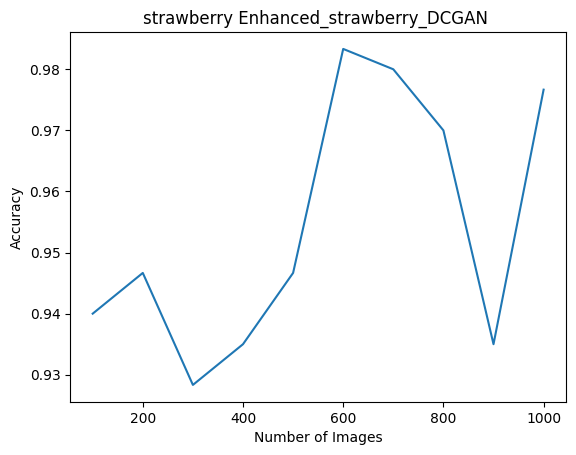

Enhanced_strawberry_DCGANxSRGAN
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
(2200, 32, 32, 3)
2
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
2
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
making the training and testing split with 30% of the dataset as testing set
making the training and testing split with 30% of the dataset as testing set
(1540, 32, 32, 3)
(660, 32, 32, 3)
Epoch 1/15
49/49 [==============================] - 1s 7ms/step - loss: 0.3300 - accuracy: 0.8279
Epoch 2/15
49/49 [==============================] - 0s 5ms/step - loss: 0.0861 - accuracy: 0.9721
Epoch 3/15
49/49 [==============================] - 0s 5ms/step - loss: 0.0933 - accuracy: 0.9643
Epoch 4/15
49/49 [==============================] - 0s 5ms/step - loss: 0.0476 - accuracy: 0.9805
Epoch 5/15
49/49 [==============================] - 0s 5ms/step - loss: 0.0455 - accuracy: 0.9870
Epoch 6/15
49/49 [======

66/66 [==============================] - 1s 7ms/step - loss: 0.3930 - accuracy: 0.8005
Epoch 2/15
66/66 [==============================] - 0s 6ms/step - loss: 0.1206 - accuracy: 0.9429
Epoch 3/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0855 - accuracy: 0.9638
Epoch 4/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0666 - accuracy: 0.9729
Epoch 5/15
66/66 [==============================] - 0s 5ms/step - loss: 0.0529 - accuracy: 0.9781
Epoch 6/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0505 - accuracy: 0.9819
Epoch 7/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0357 - accuracy: 0.9852
Epoch 8/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0480 - accuracy: 0.9805
Epoch 9/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0288 - accuracy: 0.9910
Epoch 10/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0249 - accuracy: 0.9910
Epoch 11/15
66/66 [===========

84/84 [==============================] - 1s 6ms/step - loss: 0.0502 - accuracy: 0.9797
Epoch 6/15
84/84 [==============================] - 1s 6ms/step - loss: 0.0407 - accuracy: 0.9846
Epoch 7/15
84/84 [==============================] - 1s 7ms/step - loss: 0.0358 - accuracy: 0.9872
Epoch 8/15
84/84 [==============================] - 1s 6ms/step - loss: 0.0286 - accuracy: 0.9910
Epoch 9/15
84/84 [==============================] - 1s 6ms/step - loss: 0.0356 - accuracy: 0.9872
Epoch 10/15
84/84 [==============================] - 0s 6ms/step - loss: 0.0363 - accuracy: 0.9872
Epoch 11/15
84/84 [==============================] - 1s 6ms/step - loss: 0.0190 - accuracy: 0.9944
Epoch 12/15
84/84 [==============================] - 0s 6ms/step - loss: 0.0142 - accuracy: 0.9977
Epoch 13/15
84/84 [==============================] - 0s 6ms/step - loss: 0.0130 - accuracy: 0.9974
Epoch 14/15
84/84 [==============================] - 0s 6ms/step - loss: 0.0119 - accuracy: 0.9981
Epoch 15/15
84/84 [=======

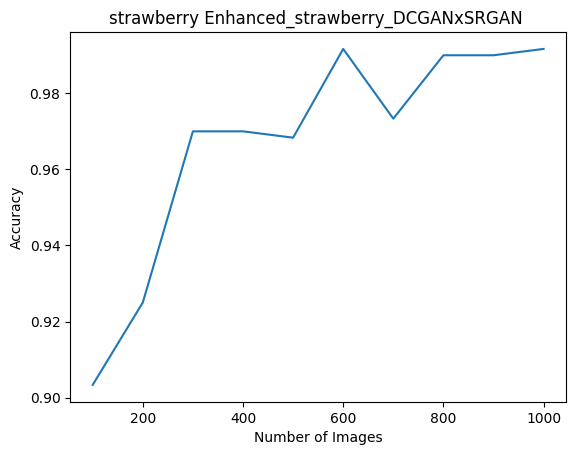

Enhanced_strawberry_LSGAN
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
(2200, 32, 32, 3)
2
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
2
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
making the training and testing split with 30% of the dataset as testing set
making the training and testing split with 30% of the dataset as testing set
(1540, 32, 32, 3)
(660, 32, 32, 3)
Epoch 1/15
49/49 [==============================] - 1s 9ms/step - loss: 0.6901 - accuracy: 0.5864
Epoch 2/15
49/49 [==============================] - 0s 7ms/step - loss: 0.1432 - accuracy: 0.9474
Epoch 3/15
49/49 [==============================] - 0s 6ms/step - loss: 0.0787 - accuracy: 0.9708
Epoch 4/15
49/49 [==============================] - 0s 6ms/step - loss: 0.0609 - accuracy: 0.9773
Epoch 5/15
49/49 [==============================] - 0s 6ms/step - loss: 0.0587 - accuracy: 0.9766
Epoch 6/15
49/49 [============

Epoch 1/15
66/66 [==============================] - 1s 7ms/step - loss: 0.4659 - accuracy: 0.7519
Epoch 2/15
66/66 [==============================] - 0s 5ms/step - loss: 0.1200 - accuracy: 0.9462
Epoch 3/15
66/66 [==============================] - 0s 5ms/step - loss: 0.0907 - accuracy: 0.9648
Epoch 4/15
66/66 [==============================] - 0s 5ms/step - loss: 0.0695 - accuracy: 0.9748
Epoch 5/15
66/66 [==============================] - 0s 5ms/step - loss: 0.0497 - accuracy: 0.9819
Epoch 6/15
66/66 [==============================] - 0s 5ms/step - loss: 0.0466 - accuracy: 0.9824
Epoch 7/15
66/66 [==============================] - 0s 5ms/step - loss: 0.0362 - accuracy: 0.9862
Epoch 8/15
66/66 [==============================] - 0s 5ms/step - loss: 0.0296 - accuracy: 0.9919
Epoch 9/15
66/66 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.9895
Epoch 10/15
66/66 [==============================] - 0s 5ms/step - loss: 0.0229 - accuracy: 0.9914
Epoch 11/15
66/66 [

84/84 [==============================] - 0s 5ms/step - loss: 0.0649 - accuracy: 0.9752
Epoch 6/15
84/84 [==============================] - 0s 5ms/step - loss: 0.0534 - accuracy: 0.9797
Epoch 7/15
84/84 [==============================] - 0s 5ms/step - loss: 0.0383 - accuracy: 0.9853
Epoch 8/15
84/84 [==============================] - 0s 5ms/step - loss: 0.0374 - accuracy: 0.9853
Epoch 9/15
84/84 [==============================] - 0s 5ms/step - loss: 0.0397 - accuracy: 0.9850
Epoch 10/15
84/84 [==============================] - 0s 5ms/step - loss: 0.0271 - accuracy: 0.9914
Epoch 11/15
84/84 [==============================] - 0s 5ms/step - loss: 0.0215 - accuracy: 0.9932
Epoch 12/15
84/84 [==============================] - 0s 6ms/step - loss: 0.0213 - accuracy: 0.9940
Epoch 13/15
84/84 [==============================] - 0s 5ms/step - loss: 0.0306 - accuracy: 0.9887
Epoch 14/15
84/84 [==============================] - 0s 6ms/step - loss: 0.0203 - accuracy: 0.9936
Epoch 15/15
84/84 [=======

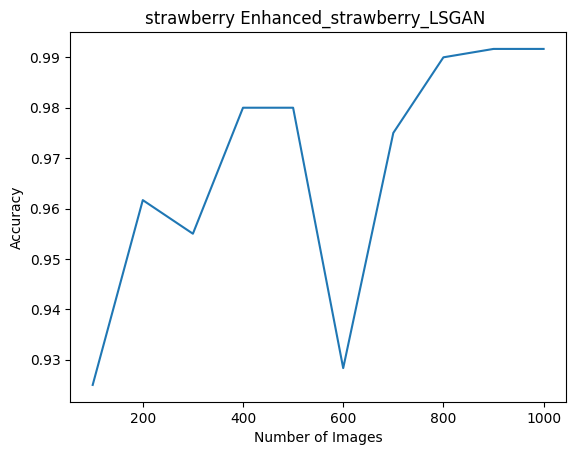

Enhanced_strawberry_LSGANxSRGAN
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
(2200, 32, 32, 3)
2
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
2
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
making the training and testing split with 30% of the dataset as testing set
making the training and testing split with 30% of the dataset as testing set
(1540, 32, 32, 3)
(660, 32, 32, 3)
Epoch 1/15
49/49 [==============================] - 1s 7ms/step - loss: 0.8039 - accuracy: 0.5487
Epoch 2/15
49/49 [==============================] - 0s 5ms/step - loss: 0.1570 - accuracy: 0.9325
Epoch 3/15
49/49 [==============================] - 0s 5ms/step - loss: 0.0585 - accuracy: 0.9818
Epoch 4/15
49/49 [==============================] - 0s 5ms/step - loss: 0.0547 - accuracy: 0.9818
Epoch 5/15
49/49 [==============================] - 0s 5ms/step - loss: 0.0371 - accuracy: 0.9877
Epoch 6/15
49/49 [======

66/66 [==============================] - 1s 8ms/step - loss: 0.6061 - accuracy: 0.6476
Epoch 2/15
66/66 [==============================] - 0s 6ms/step - loss: 0.2015 - accuracy: 0.9043
Epoch 3/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0871 - accuracy: 0.9657
Epoch 4/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0759 - accuracy: 0.9757
Epoch 5/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0552 - accuracy: 0.9795
Epoch 6/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0433 - accuracy: 0.9838
Epoch 7/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0524 - accuracy: 0.9838
Epoch 8/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0383 - accuracy: 0.9824
Epoch 9/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0406 - accuracy: 0.9900
Epoch 10/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0327 - accuracy: 0.9910
Epoch 11/15
66/66 [===========

84/84 [==============================] - 1s 6ms/step - loss: 0.0633 - accuracy: 0.9774
Epoch 6/15
84/84 [==============================] - 1s 6ms/step - loss: 0.0517 - accuracy: 0.9820
Epoch 7/15
84/84 [==============================] - 1s 7ms/step - loss: 0.0387 - accuracy: 0.9880
Epoch 8/15
84/84 [==============================] - 1s 6ms/step - loss: 0.0328 - accuracy: 0.9891
Epoch 9/15
84/84 [==============================] - 1s 6ms/step - loss: 0.0363 - accuracy: 0.9876
Epoch 10/15
84/84 [==============================] - 1s 7ms/step - loss: 0.0269 - accuracy: 0.9917
Epoch 11/15
84/84 [==============================] - 1s 6ms/step - loss: 0.0209 - accuracy: 0.9944
Epoch 12/15
84/84 [==============================] - 1s 7ms/step - loss: 0.0186 - accuracy: 0.9959
Epoch 13/15
84/84 [==============================] - 1s 7ms/step - loss: 0.0161 - accuracy: 0.9974
Epoch 14/15
84/84 [==============================] - 1s 7ms/step - loss: 0.0148 - accuracy: 0.9981
Epoch 15/15
84/84 [=======

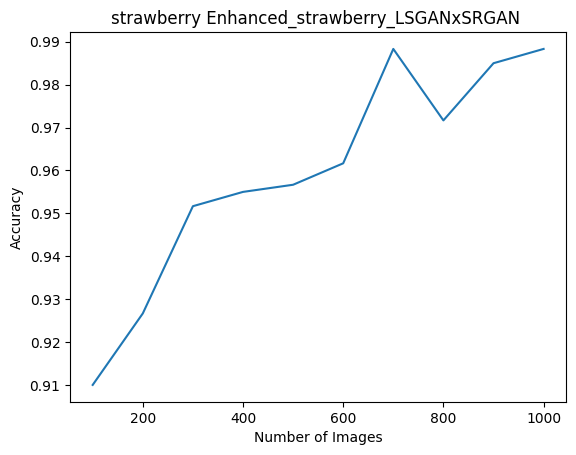

Enhanced_strawberry_WGAN
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
(2200, 32, 32, 3)
2
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
2
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
making the training and testing split with 30% of the dataset as testing set
making the training and testing split with 30% of the dataset as testing set
(1540, 32, 32, 3)
(660, 32, 32, 3)
Epoch 1/15
49/49 [==============================] - 1s 7ms/step - loss: 0.5643 - accuracy: 0.6981
Epoch 2/15
49/49 [==============================] - 0s 6ms/step - loss: 0.1806 - accuracy: 0.9019
Epoch 3/15
49/49 [==============================] - 0s 5ms/step - loss: 0.0777 - accuracy: 0.9662
Epoch 4/15
49/49 [==============================] - 0s 5ms/step - loss: 0.0635 - accuracy: 0.9786
Epoch 5/15
49/49 [==============================] - 0s 6ms/step - loss: 0.0557 - accuracy: 0.9812
Epoch 6/15
49/49 [=============

66/66 [==============================] - 1s 7ms/step - loss: 0.6243 - accuracy: 0.6776
Epoch 2/15
66/66 [==============================] - 0s 6ms/step - loss: 0.1679 - accuracy: 0.9114
Epoch 3/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0774 - accuracy: 0.9648
Epoch 4/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0893 - accuracy: 0.9610
Epoch 5/15
66/66 [==============================] - 0s 5ms/step - loss: 0.0603 - accuracy: 0.9771
Epoch 6/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0490 - accuracy: 0.9805
Epoch 7/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0445 - accuracy: 0.9829
Epoch 8/15
66/66 [==============================] - 0s 7ms/step - loss: 0.0445 - accuracy: 0.9848
Epoch 9/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0400 - accuracy: 0.9848
Epoch 10/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0327 - accuracy: 0.9890
Epoch 11/15
66/66 [===========

84/84 [==============================] - 0s 5ms/step - loss: 0.0526 - accuracy: 0.9759
Epoch 6/15
84/84 [==============================] - 0s 5ms/step - loss: 0.0493 - accuracy: 0.9812
Epoch 7/15
84/84 [==============================] - 0s 5ms/step - loss: 0.0502 - accuracy: 0.9771
Epoch 8/15
84/84 [==============================] - 0s 5ms/step - loss: 0.0434 - accuracy: 0.9823
Epoch 9/15
84/84 [==============================] - 0s 5ms/step - loss: 0.0334 - accuracy: 0.9876
Epoch 10/15
84/84 [==============================] - 0s 6ms/step - loss: 0.0345 - accuracy: 0.9865
Epoch 11/15
84/84 [==============================] - 0s 5ms/step - loss: 0.0282 - accuracy: 0.9887
Epoch 12/15
84/84 [==============================] - 0s 5ms/step - loss: 0.0238 - accuracy: 0.9947
Epoch 13/15
84/84 [==============================] - 0s 5ms/step - loss: 0.0182 - accuracy: 0.9959
Epoch 14/15
84/84 [==============================] - 0s 5ms/step - loss: 0.0212 - accuracy: 0.9936
Epoch 15/15
84/84 [=======

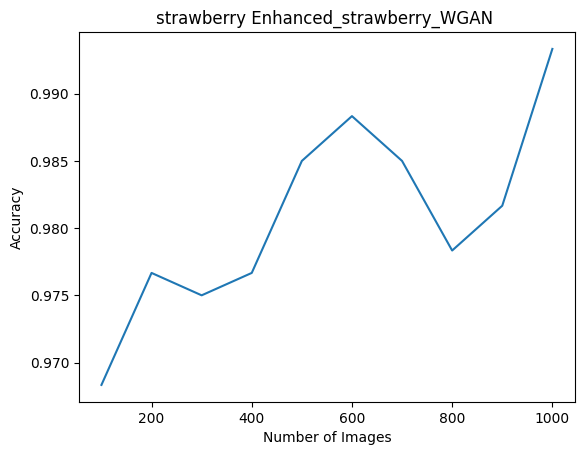

Enhanced_strawberry_WGANxSRGAN
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
(2200, 32, 32, 3)
2
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
2
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
making the training and testing split with 30% of the dataset as testing set
making the training and testing split with 30% of the dataset as testing set
(1540, 32, 32, 3)
(660, 32, 32, 3)
Epoch 1/15
49/49 [==============================] - 1s 8ms/step - loss: 0.6247 - accuracy: 0.6162
Epoch 2/15
49/49 [==============================] - 0s 5ms/step - loss: 0.3278 - accuracy: 0.8344
Epoch 3/15
49/49 [==============================] - 0s 5ms/step - loss: 0.2245 - accuracy: 0.8805
Epoch 4/15
49/49 [==============================] - 0s 5ms/step - loss: 0.1640 - accuracy: 0.9065
Epoch 5/15
49/49 [==============================] - 0s 5ms/step - loss: 0.1319 - accuracy: 0.9331
Epoch 6/15
49/49 [=======

Epoch 1/15
66/66 [==============================] - 2s 11ms/step - loss: 0.7066 - accuracy: 0.6243
Epoch 2/15
66/66 [==============================] - 1s 10ms/step - loss: 0.3852 - accuracy: 0.8043
Epoch 3/15
66/66 [==============================] - 1s 9ms/step - loss: 0.2605 - accuracy: 0.8576
Epoch 4/15
66/66 [==============================] - 1s 8ms/step - loss: 0.2014 - accuracy: 0.8986
Epoch 5/15
66/66 [==============================] - 1s 8ms/step - loss: 0.1367 - accuracy: 0.9248
Epoch 6/15
66/66 [==============================] - 1s 9ms/step - loss: 0.1471 - accuracy: 0.9262
Epoch 7/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0968 - accuracy: 0.9548
Epoch 8/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0738 - accuracy: 0.9638
Epoch 9/15
66/66 [==============================] - 0s 5ms/step - loss: 0.0739 - accuracy: 0.9714
Epoch 10/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0501 - accuracy: 0.9786
Epoch 11/15
66/66

84/84 [==============================] - 0s 6ms/step - loss: 0.1295 - accuracy: 0.9455
Epoch 6/15
84/84 [==============================] - 1s 6ms/step - loss: 0.0729 - accuracy: 0.9703
Epoch 7/15
84/84 [==============================] - 1s 7ms/step - loss: 0.0627 - accuracy: 0.9699
Epoch 8/15
84/84 [==============================] - 1s 7ms/step - loss: 0.0622 - accuracy: 0.9733
Epoch 9/15
84/84 [==============================] - 1s 7ms/step - loss: 0.0409 - accuracy: 0.9827
Epoch 10/15
84/84 [==============================] - 1s 8ms/step - loss: 0.0362 - accuracy: 0.9865
Epoch 11/15
84/84 [==============================] - 1s 7ms/step - loss: 0.0321 - accuracy: 0.9891
Epoch 12/15
84/84 [==============================] - 1s 6ms/step - loss: 0.0262 - accuracy: 0.9906
Epoch 13/15
84/84 [==============================] - 1s 6ms/step - loss: 0.0231 - accuracy: 0.9940
Epoch 14/15
84/84 [==============================] - 1s 8ms/step - loss: 0.0196 - accuracy: 0.9959
Epoch 15/15
84/84 [=======

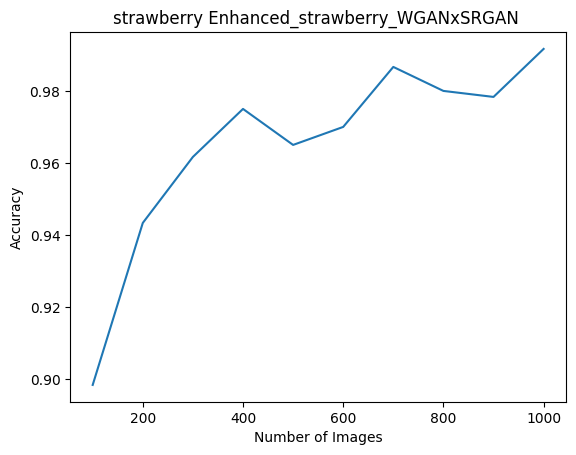

Enhanced_strawberry_BiGAN
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
(2200, 32, 32, 3)
2
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
2
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
making the training and testing split with 30% of the dataset as testing set
making the training and testing split with 30% of the dataset as testing set
(1540, 32, 32, 3)
(660, 32, 32, 3)
Epoch 1/15
49/49 [==============================] - 2s 10ms/step - loss: 0.7151 - accuracy: 0.6006
Epoch 2/15
49/49 [==============================] - 0s 10ms/step - loss: 0.2133 - accuracy: 0.8922
Epoch 3/15
49/49 [==============================] - 0s 9ms/step - loss: 0.1458 - accuracy: 0.9208
Epoch 4/15
49/49 [==============================] - 0s 8ms/step - loss: 0.0822 - accuracy: 0.9591
Epoch 5/15
49/49 [==============================] - 0s 9ms/step - loss: 0.0752 - accuracy: 0.9649
Epoch 6/15
49/49 [==========

66/66 [==============================] - 1s 7ms/step - loss: 0.5642 - accuracy: 0.7129
Epoch 2/15
66/66 [==============================] - 0s 5ms/step - loss: 0.1846 - accuracy: 0.9076
Epoch 3/15
66/66 [==============================] - 0s 5ms/step - loss: 0.1458 - accuracy: 0.9338
Epoch 4/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0939 - accuracy: 0.9557
Epoch 5/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0740 - accuracy: 0.9643
Epoch 6/15
66/66 [==============================] - 0s 5ms/step - loss: 0.0697 - accuracy: 0.9695
Epoch 7/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0528 - accuracy: 0.9738
Epoch 8/15
66/66 [==============================] - 0s 5ms/step - loss: 0.0472 - accuracy: 0.9824
Epoch 9/15
66/66 [==============================] - 0s 5ms/step - loss: 0.0457 - accuracy: 0.9790
Epoch 10/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0386 - accuracy: 0.9867
Epoch 11/15
66/66 [===========

84/84 [==============================] - 1s 7ms/step - loss: 0.0836 - accuracy: 0.9609
Epoch 6/15
84/84 [==============================] - 1s 7ms/step - loss: 0.0694 - accuracy: 0.9677
Epoch 7/15
84/84 [==============================] - 1s 6ms/step - loss: 0.0509 - accuracy: 0.9782
Epoch 8/15
84/84 [==============================] - 1s 6ms/step - loss: 0.0436 - accuracy: 0.9823
Epoch 9/15
84/84 [==============================] - 0s 6ms/step - loss: 0.0333 - accuracy: 0.9876
Epoch 10/15
84/84 [==============================] - 0s 6ms/step - loss: 0.0289 - accuracy: 0.9902
Epoch 11/15
84/84 [==============================] - 0s 6ms/step - loss: 0.0325 - accuracy: 0.9891
Epoch 12/15
84/84 [==============================] - 1s 7ms/step - loss: 0.0226 - accuracy: 0.9959
Epoch 13/15
84/84 [==============================] - 1s 7ms/step - loss: 0.0301 - accuracy: 0.9880
Epoch 14/15
84/84 [==============================] - 1s 6ms/step - loss: 0.0190 - accuracy: 0.9962
Epoch 15/15
84/84 [=======

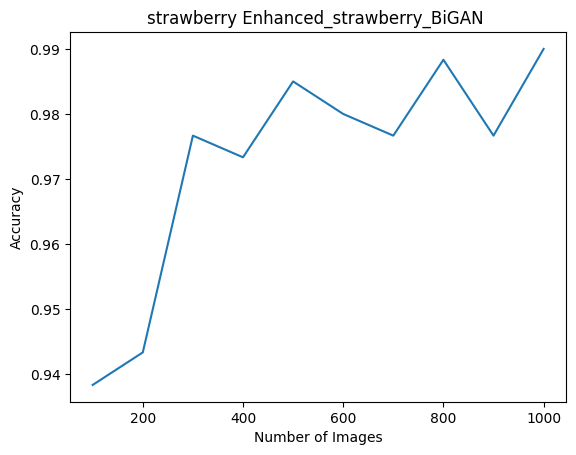

Enhanced_strawberry_BiGANxSRGAN
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
(2200, 32, 32, 3)
2
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
2
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
making the training and testing split with 30% of the dataset as testing set
making the training and testing split with 30% of the dataset as testing set
(1540, 32, 32, 3)
(660, 32, 32, 3)
Epoch 1/15
49/49 [==============================] - 1s 8ms/step - loss: 0.7836 - accuracy: 0.5636
Epoch 2/15
49/49 [==============================] - 0s 5ms/step - loss: 0.3905 - accuracy: 0.8195
Epoch 3/15
49/49 [==============================] - 0s 7ms/step - loss: 0.2145 - accuracy: 0.8877
Epoch 4/15
49/49 [==============================] - 0s 6ms/step - loss: 0.2398 - accuracy: 0.8922
Epoch 5/15
49/49 [==============================] - 0s 6ms/step - loss: 0.1553 - accuracy: 0.9286
Epoch 6/15
49/49 [======

Epoch 1/15
66/66 [==============================] - 2s 7ms/step - loss: 0.7492 - accuracy: 0.6062
Epoch 2/15
66/66 [==============================] - 0s 5ms/step - loss: 0.3953 - accuracy: 0.8029
Epoch 3/15
66/66 [==============================] - 0s 5ms/step - loss: 0.3073 - accuracy: 0.8495
Epoch 4/15
66/66 [==============================] - 0s 5ms/step - loss: 0.2181 - accuracy: 0.8938
Epoch 5/15
66/66 [==============================] - 0s 5ms/step - loss: 0.1623 - accuracy: 0.9214
Epoch 6/15
66/66 [==============================] - 0s 5ms/step - loss: 0.1269 - accuracy: 0.9381
Epoch 7/15
66/66 [==============================] - 0s 6ms/step - loss: 0.0991 - accuracy: 0.9495
Epoch 8/15
66/66 [==============================] - 0s 5ms/step - loss: 0.0644 - accuracy: 0.9714
Epoch 9/15
66/66 [==============================] - 0s 5ms/step - loss: 0.0487 - accuracy: 0.9795
Epoch 10/15
66/66 [==============================] - 0s 5ms/step - loss: 0.0555 - accuracy: 0.9819
Epoch 11/15
66/66 [

84/84 [==============================] - 0s 6ms/step - loss: 0.1254 - accuracy: 0.9440
Epoch 6/15
84/84 [==============================] - 0s 6ms/step - loss: 0.1304 - accuracy: 0.9425
Epoch 7/15
84/84 [==============================] - 1s 6ms/step - loss: 0.0711 - accuracy: 0.9692
Epoch 8/15
84/84 [==============================] - 0s 6ms/step - loss: 0.0697 - accuracy: 0.9718
Epoch 9/15
84/84 [==============================] - 0s 6ms/step - loss: 0.0544 - accuracy: 0.9789
Epoch 10/15
84/84 [==============================] - 0s 6ms/step - loss: 0.0667 - accuracy: 0.9722
Epoch 11/15
84/84 [==============================] - 1s 6ms/step - loss: 0.0382 - accuracy: 0.9865
Epoch 12/15
84/84 [==============================] - 1s 7ms/step - loss: 0.0449 - accuracy: 0.9831
Epoch 13/15
84/84 [==============================] - 1s 7ms/step - loss: 0.0309 - accuracy: 0.9898
Epoch 14/15
84/84 [==============================] - 0s 6ms/step - loss: 0.0247 - accuracy: 0.9940
Epoch 15/15
84/84 [=======

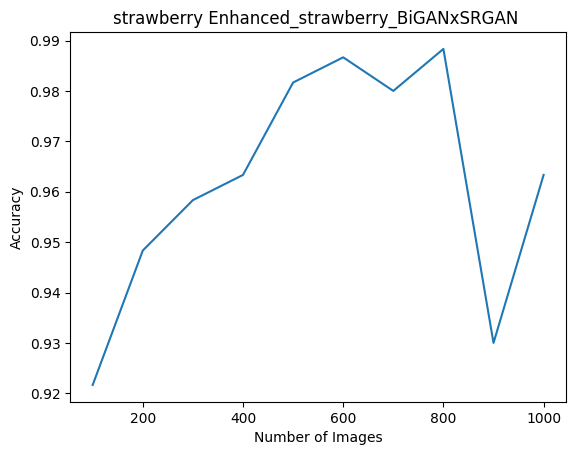

In [40]:
types_gans = ['Enhanced_strawberry_DCGAN', 'Enhanced_strawberry_DCGANxSRGAN', 
              'Enhanced_strawberry_LSGAN', 'Enhanced_strawberry_LSGANxSRGAN',
              'Enhanced_strawberry_WGAN', 'Enhanced_strawberry_WGANxSRGAN', 
              'Enhanced_strawberry_BiGAN', 'Enhanced_strawberry_BiGANxSRGAN']

for names in types_gans:
    print(names)
    type_gan_path = names
    title_gan = 'strawberry ' + names + " "
    orig_plant_path = 'Orignal_strawberry'
    
    perf_list, n_list = generate_performance_graph(type_gan_path, orig_plant_path)
    plot_graph(perf_list, n_list, title_gan)


